<a href="https://colab.research.google.com/github/90splayer/Applied-ML/blob/main/Week03_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.54MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 56.1MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.1MB/s]


In [5]:
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()

        self.flatten = nn.Flatten()

        self.net = nn.Sequential(
            nn.Linear(28*28, 2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.net(x)

model = FashionNN()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
epochs = 5

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1, Loss: 0.4440
Epoch 2, Loss: 0.4289
Epoch 3, Loss: 0.4165
Epoch 4, Loss: 0.4148
Epoch 5, Loss: 0.4066


In [9]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

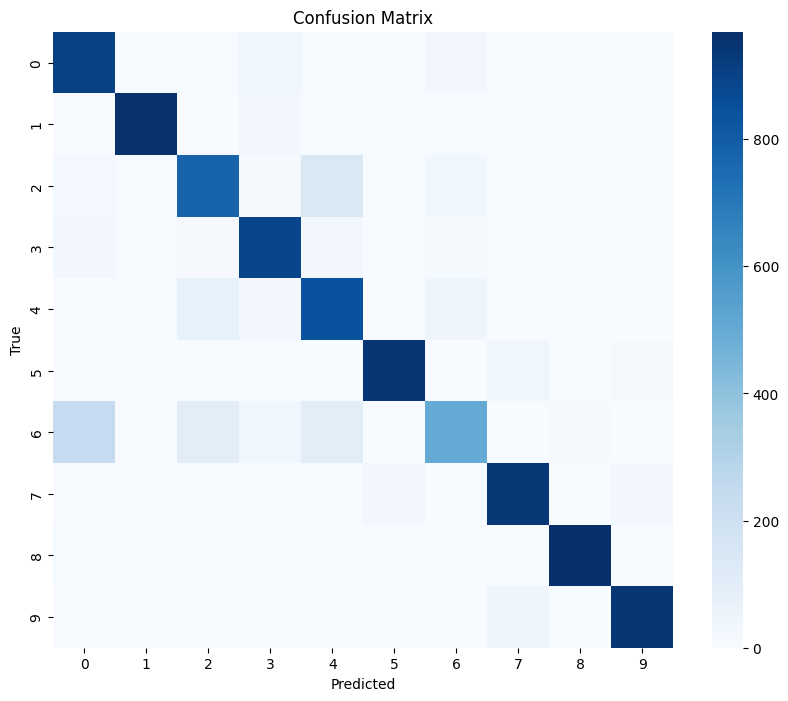

In [10]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [11]:
correct = []
incorrect = []

for i in range(len(all_preds)):
    if all_preds[i] == all_labels[i] and len(correct) < 10:
        correct.append(i)
    elif all_preds[i] != all_labels[i] and len(incorrect) < 10:
        incorrect.append(i)

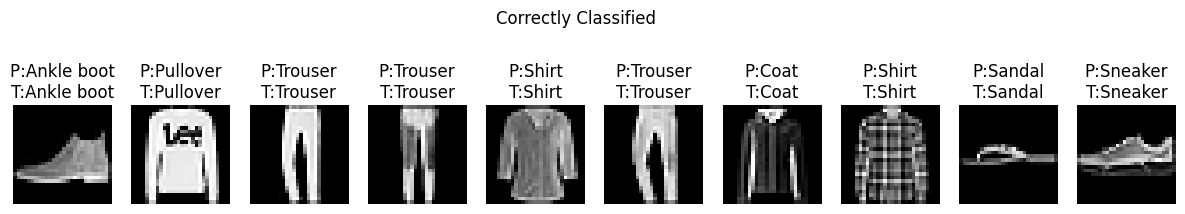

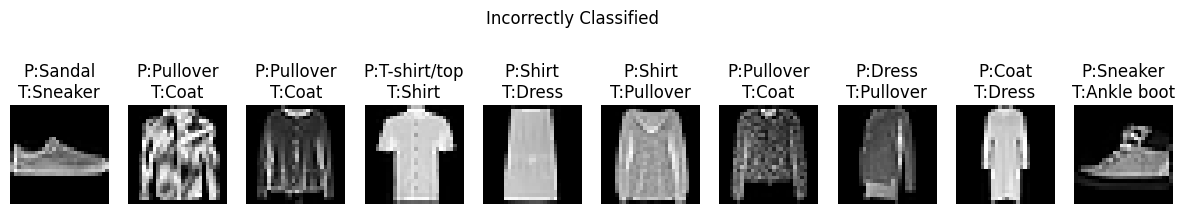

In [12]:
classes = trainset.classes

def plot_examples(indices, title):
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices):
        image, label = testset[idx]
        plt.subplot(1,10,i+1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"P:{classes[all_preds[idx]]}\nT:{classes[label]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_examples(correct, "Correctly Classified")
plot_examples(incorrect, "Incorrectly Classified")

In [13]:
cm = confusion_matrix(all_labels, all_preds)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(class_accuracy):
    print(f"{classes[i]}: {acc*100:.2f}%")

T-shirt/top: 90.80%
Trouser: 96.00%
Pullover: 77.50%
Dress: 89.20%
Coat: 84.10%
Sandal: 94.30%
Shirt: 50.20%
Sneaker: 94.00%
Bag: 96.90%
Ankle boot: 94.60%
